# Exercises Neural Networks

In [112]:
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow. keras.optimizers import Adam  # type: ignore                         # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")

# Guidelines
1. Activation function for hidden layers: relu or sigmoid are popular.
2. Activation function for the output layer:
    - Classification with one-hot encoding: softmax (provides probabilities for each output summing to 1).
    - Classification with 2 classes and 1 output: sigmoid (provides 1 probability). PS: One-hot encoding can also be used for 2 classes (then you have 2 outputs).
    - Regression: linear.
3. Backpropagation algorithm: Adam is popular (learning_rate indicates how much the weights/biases are adjusted).
4. Loss function:
    - Classification with one-hot encoding: `categorical_crossentropy` (a type of distance between probabilities).
    - Classification with 2 classes and 1 output: `binary_crossentropy`.
    - Regression: `MeanSquaredError` or `MeanAbsoluteError`.
5. Metrics can be optionally added.
6. Epochs: Number of times you iterate over the entire training dataset.
7. Batch size: Size of the batch (default is 32) after which backpropagation (adjustment of weights/biases) occurs. For example, if the training dataset contains 1000 samples and the batch size is 100, there will be 10 backpropagation per epoch.

|                                | Output Activation | Loss                     | Metrics                       |
|:-------------------------------|:------------------|:-------------------------|:------------------------------|
| Regression                     | Linear            | MeanSquaredError()       | MeanAbsolutePercentageError() |
|                                |                   | MeanAbsoluteError()      |                               |
| Classificatie 1 output         | Sigmoid           | Binary_crossentropy      | Accuracy                      |
| Classificatie one-hot encoding | Softmax           | Categorical_crossentropy | Accuracy                      |


## Theoretical questions

### Question 0: Demo ANN (Artificial Neural Network)

In [3]:
# This is one Artificial Neuron with 2 inputs (1,1), 2 weights (0.3, -0.1) and 1 bias (-0.7)
inputANN = pd.array([1,1])
weightsANN = pd.array([0.3, -0.1])
biasANN = -0.7

integratie = np.dot(inputANN, weightsANN) + biasANN
print(f"Output Integration: {integratie}")

activation = 1 / (1 + math.exp(-integratie))
print(f"Output Activation: {activation}")

Output Integration: -0.5
Output Activation: 0.3775406687981454


### Question 0: XOR ANN (Artificial Neural Network)

In [4]:
# Stap 1: Data
xor_data = pd.DataFrame({'P1': [0,1,0,1], 'P2': [0,0,1,1], 'Q' : [0,1,1,0]})
x_xor_data= xor_data[['P1', 'P2']]
y_xor_data = xor_data[['Q']]
                       
# Step 2: Model
inputs_xor = Input(shape=(2,))
x_xor = Dense(2, activation='sigmoid')(inputs_xor) # Or relu
outputs_xor = Dense(1, activation='sigmoid')(x_xor) # Or relu
model_xor = Model(inputs_xor, outputs_xor, name='XOR_NN')

# Step 3: Compile
model_xor.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [5]:
# Step 4: Fit
history_xor = model_xor.fit(
                            x_xor_data, 
                            y_xor_data, 
                            epochs=200, 
                            callbacks=[PlotLossesKeras()], 
                            verbose=False)

accuracy
	accuracy         	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	loss             	 (min:    0.715, max:    0.715, cur:    0.715)


In [6]:
model_xor.summary()

Model: "XOR_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

### Question 1:
- Bouw een neuraal netwerk op om het resultaat van een student op de gapminder test te bepalen aan de hand van het aantal uren wiskunde in het laatste jaar van het middelbaar, het aantal complotheorieën waarin hij/zij gelooft (zie code vraag 1 vragenlijst les Evaluatimetrieken) en het aantal broers en zussen. Splits de gegevens op is een training en een test data set (`90-10` verhouding). Normaliseer ook de data met behulp van de decimal scaling.

- Opmerking: de variabele gapminder test bevat niet getallen. 
    - Zet de data om naar een geheel getal –integer- dat het percentage weergeeft.
    - Plaats daarna de gegevens in `5` klassen: (`0,20`), (`20,40`), (`40,60`), (`60,80`), (`80,100`).
    - Vervang de klasse door de index van de klasse.

**Name of Columns**: `gapminder` `schrijfhand` `schoenmaat` `lengte` `bloedgroep` `resus` `siblings` `Samenzweringen` `rijbewijs` `domicilie in Antwerpen` `afstudeerrichting` `vrijetijdsbesteding` `uren wiskunde` `informatica` `belangrijk` `uren buiten schooluren` `afstand tot KdG` `vervoersmiddel` `klimaatopwarming` `zakgeld` `stukken fruit` `fruitvoorkeur` `besturingssysteem` `belangrijkste app` `M1 - stelen` `M2 - team` `M3 - beschermen` `M4 - voorbeeld` `M5 - embryo` `M6 - vrijheid` `mascotte` `zwaarste vak` `boeienste vak` `studiepunt`

In [7]:
data1 = pd.read_csv('../Data/Data1.csv', delimiter=';', decimal=',')
display(data1.head())

,gapminder,schrijfhand,schoenmaat,lengte,bloedgroep,resus,siblings,Samenzweringen,rijbewijs,domicilie in Antwerpen,...,M1 - stelen,M2 - team,M3 - beschermen,M4 - voorbeeld,M5 - embryo,M6 - vrijheid,mascotte,zwaarste vak,boeienste vak,studiepunt
0,7/18,Rechts,43.0,184,O,positief,5,De tsunami van 2004 in de Indische Oceaan was ...,Categorie B: Wagens.,"buiten de stad (een dorp, een gehucht, het pla...",...,7,2,8,6,5,4.0,"1=Bever,2=Wasbeer,3=Otter,4=Wolf,5=Poema,6=Pan...",Management 1,Data science 1,16-20 uren
1,3/18,Rechts,42.0,163,Weet ik niet,Weet ik niet,1,Prinses Diana kwam niet per ongeluk om het leven,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,6,7,3.0,"1=Bever,2=Wolf,3=Bizon,4=Otter,5=Panter,6=Poem...",Management 1,Computersystemen 1,<= 10 uren
2,12/18,Rechts,45.0,183,AB,positief,2,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,6,3,7,7,10,6.0,"1=Bruine beer,2=Poema,3=Panter,4=Wolf,5=Vos,6=...",Management 1,Programmeren 1 - Java,16-20 uren
3,5/18,Rechts,44.0,175,A,positief,2,De wereld wordt eigenlijk gecontroleerd door e...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,9,10,10,10,10,0.0,"1=Wasbeer,2=Wolf,3=Bruine beer,4=Das,5=Vos,6=B...",Management 1,Data science 1,<= 10 uren
4,6/18,Rechts,43.0,173,B,positief,3,De wereld wordt eigenlijk gecontroleerd door e...,Categorie B: Wagens.,in een stad,...,10,6,10,7,7,2.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bizon,5=Panter,6=...",Management 1,Data science 1,<= 10 uren


### Question 2:
- Herneem het neuraal netwerk uit vraag 1. Maak de confusion matrix, bereken de meest gebruikte evaluatiemetrieken en teken de ROC.

### Question 3: The Simpsons Revisited
- We want to be able to predict the gender of a Simpson using... a neural network. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Simpsons dataset (`The_Simpsons_Original.csv`).
    - Determine which columns we cannot use with this prediction?
    - Now create an input training data set `x_simpsons` and normalize it (min-max normalization). Do the same for the output column(y4_simpsons).
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the gender of your `x_simpsons`. Do they match the targets? Also predict the gender of the unknown Simpson (Comic guy: `hairlenght=8`, `weight=500`, `age=38`). Does this match the prediction you were made with decision trees?

**Name of Columns**: `name` `hair length` `weight` `age` `gender`

In [8]:
# 1
theSimpsonsOriginal = pd.read_csv('../Data/The_Simpsons_Original.csv', delimiter=',')
display(theSimpsonsOriginal.head())

,name,hair length,weight,age,gender
0,Homer,0,250,36,M
1,Marge,10,150,34,F
2,Bart,2,90,10,M
3,Lisa,6,78,8,F
4,Maggie,4,20,1,F


In [9]:
# 2
theSimpsonsOriginal = theSimpsonsOriginal.drop(columns=['name'])
display(theSimpsonsOriginal.head())
print("We can't use the column 'name' in this prediction. It's a unique identifier and string.")

,hair length,weight,age,gender
0,0,250,36,M
1,10,150,34,F
2,2,90,10,M
3,6,78,8,F
4,4,20,1,F


We can't use the column 'name' in this prediction. It's a unique identifier and string.


In [10]:
# 3
x_simpsons = theSimpsonsOriginal[['hair length', 'weight', 'age']]                                              # Get the input
y_simpsons = theSimpsonsOriginal[['gender']]                                                                    # Get the output

x_simpsons_norm = (x_simpsons - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())                       # Normalization of the input
y_simpsons_rep = y_simpsons.replace(to_replace=['M', 'F'], value=[0, 1])                                        # Replace the output
y_simpsons_rep = to_categorical(y_simpsons_rep)                                                                 # One-hot encoding
y_simpsons_norm = (y_simpsons_rep - y_simpsons_rep.min()) / (y_simpsons_rep.max() - y_simpsons_rep.min())       # Normalization of the output

In [11]:
# 4
inputs_simpsons = Input(shape=(3,))
x_simp = Dense(6, activation='sigmoid')(inputs_simpsons)
x_simp = Dense(12, activation='sigmoid')(x_simp)
x_simp = Dense(24, activation='sigmoid')(x_simp)
x_simp = Dense(12, activation='sigmoid')(x_simp)
x_simp = Dense(6, activation='sigmoid')(x_simp)
outputs_simpsons = Dense(2, activation='softmax')(x_simp) # Activation=softmax for one-hot encoding (classification)
model_simpsons = Model(inputs_simpsons, outputs_simpsons, name='Simpsons_NN')

model_simpsons.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy']) # Binary_crossentropy for one-hot encoding

In [12]:
history_simpsons = model_simpsons.fit(
                                    x_simpsons_norm,
                                    y_simpsons_rep,
                                    epochs=200,
                                    callbacks=[PlotLossesKeras()],
                                    verbose=False)

accuracy
	accuracy         	 (min:    0.444, max:    0.444, cur:    0.444)
Loss
	loss             	 (min:    0.726, max:    0.728, cur:    0.726)


In [114]:
model_simpsons.summary()

Model: "Simpsons_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,438 (9.53 KB)

 Trainable params: 812 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626 (6.36 KB)

In [14]:
# 5
comicGuy = pd.DataFrame({'hair length': [8], 'weight': [500], 'age': [38]})
comicGuy_norm = (comicGuy - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())
prediction = model_simpsons.predict(comicGuy_norm)
print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Prediction: [[0.45356438 0.5464356 ]]


### Question 4: Forecast demo Revisited
- We want to be able to predict a company's revenues per quarter for the last `5` years. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Forecasting dataset (`forecastdemo.csv`)
    - Determine which columns we cannot use in this prediction?
    - Now create an input training data set `x_forcast` and an output column `y_forcast`. Normalize where necessary.
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the returns associated with `x_forcast`. Do they correspond to actual returns? Create one plot of the original data and the predicted data.

**Name of Columns**: `Year` `Quarter` `Revenu`

In [61]:
# 1
forcastDemo = pd.read_csv('../Data/ForcastDemo.csv', delimiter=';')
display(forcastDemo.head())

,Year,Quarter,Revenu
0,1,1,20
1,1,2,100
2,1,3,175
3,1,4,13
4,2,1,37


In [39]:
# 2
print("We can't use the column 'Revenu' because that's the column we are trying to predict.")

We can't use the column 'Revenu' because that's the column we are trying to predict.


In [88]:
# 3
x_forcast = forcastDemo[['Year', 'Quarter']]                                                                # Get the input
y_forcast = forcastDemo[['Revenu']]                                                                         # Get the output

y_forcast_norm = (y_forcast - y_forcast.min()) / (y_forcast.max() - y_forcast.min())                       # Normalization of the output

In [93]:
# 4
inputs_forcast = Input(shape=(2,))
x_for = Dense(4, activation='relu')(inputs_forcast)
x_for = Dense(8, activation='relu')(x_for)
x_for = Dense(16, activation='relu')(x_for)
x_for = Dense(8, activation='relu')(x_for)
x_for = Dense(4, activation='relu')(x_for)
x_for = Dense(2, activation='relu')(x_for)
outputs_forcast = Dense(1, activation='linear')(x_for) # Activation=linear for regression (no activation)

model_forcast = Model(inputs_forcast, outputs_forcast, name='Forcast_NN')

lr = 0.001  # Learning rate
model_forcast.compile(optimizer=RMSprop(learning_rate=lr), 
                      loss=keras.losses.MeanAbsoluteError(), 
                      metrics=[keras.metrics.MeanAbsolutePercentageError()])

In [94]:
history_forcast = model_forcast.fit(
                                    x_forcast,
                                    y_forcast_norm,
                                    epochs=1000,
                                    callbacks=[PlotLossesKeras()],
                                    verbose=False)

Loss
	loss             	 (min:    0.225, max:    0.340, cur:    0.225)
mean_absolute_percentage_error
	mean_absolute_percentage_error 	 (min:   95.000, max: 14239072.000, cur: 14239061.000)


In [96]:
model_forcast.summary()

Model: "Forcast_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 764 (2.99 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 383 (1.50 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


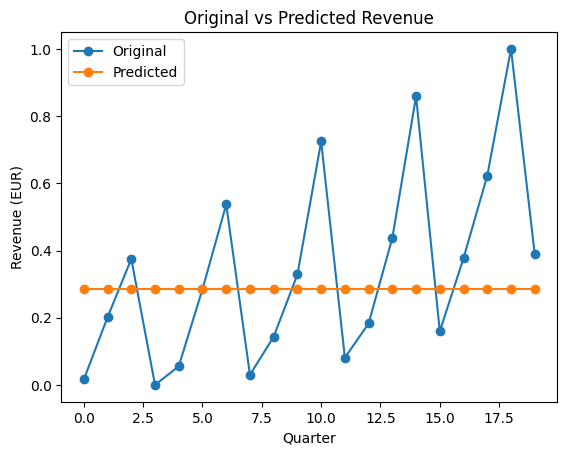

In [107]:
# 5
predicted=model_forcast.predict(x_forcast)
plt.figure()
plt.plot(range(0,len(forcastDemo)), y_forcast_norm, 'o-', label = 'Original')
plt.plot(range(0,len(forcastDemo)), predicted[:,0], 'o-', label = 'Predicted')
plt.xlabel('Quarter')
plt.ylabel('Revenue (EUR)')
plt.title('Original vs Predicted Revenue')
plt.legend()
plt.show()

### Question 5: Iris
- Load the iris dataset (`iris.csv`) and study its contents.
- Determine which columns we cannot use in this prediction?
- Now create an input data set `x_iris` and normalize it. Try one of the normalization techniques that you have not yet used in an exercise or assignment.
- Create a training data set and a test data set (`x_train_iris` and `x_test_iris`) consisting of `80%` and `20%` (randomly chosen) of the input data set `x_iris` respectively.
- Create a neural network with the correct inputs and outputs.
- Evaluate your neural network on your test data set (`x_test_iris`). What accuracy do you achieve?

**Name of Columns**: `sepal length` `sepal width` `petal length` `petal width` `target`

In [108]:
# 1
iris = pd.read_csv('../Data/Iris.csv', delimiter=',', decimal='.')
display(iris.head())

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
# 2
print("We can't use the column 'target' in this prediction. It's a string.")

We can't use the column 'target' in this prediction. It's a string.


In [140]:
# 3
x_iris = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]                                       # Get the input
y_iris = iris[['target']]                                                                                           # Get the output

x_iris_norm = (x_iris - x_iris.min()) / (x_iris.max() - x_iris.min())                                               # Normalization of the input
y_iris_rep = y_iris.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2])       # Replace the output
y_iris_cat = to_categorical(y_iris_rep)                                                                             # One-hot encoding

In [141]:
# 3
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(x_iris_norm, y_iris_cat, test_size=0.2)     # Split the data
display(x_train_iris.head()) # 80%
display(x_test_iris.head())  # 20%

,sepal length,sepal width,petal length,petal width
80,0.333333,0.166667,0.474576,0.416667
11,0.138889,0.583333,0.101695,0.041667
117,0.944444,0.750000,0.966102,0.875000
40,0.194444,0.625000,0.050847,0.083333
85,0.472222,0.583333,0.593220,0.625000


,sepal length,sepal width,petal length,petal width
109,0.805556,0.666667,0.864407,1.000000
50,0.750000,0.500000,0.627119,0.541667
102,0.777778,0.416667,0.830508,0.833333
42,0.027778,0.500000,0.050847,0.041667
125,0.805556,0.500000,0.847458,0.708333


In [149]:
# 4
inputs_iris = Input(shape=(4,))
x_ir = Dense(8, activation='sigmoid')(inputs_iris)
x_ir = Dense(16, activation='sigmoid')(x_ir)
x_ir = Dense(32, activation='sigmoid')(x_ir)
x_ir = Dense(16, activation='sigmoid')(x_ir)
x_ir = Dense(8, activation='sigmoid')(x_ir)
outputs_iris = Dense(3, activation='softmax')(x_ir) # Activation=softmax for one-hot encoding (classification)

model_iris = Model(inputs_iris, outputs_iris, name='Iris_NN')

lr = 0.001  # Learning rate
model_iris.compile(optimizer=Adam(learning_rate=lr), 
                   loss=keras.losses.categorical_crossentropy, 
                   metrics=['accuracy'])

In [150]:
history_iris = model_iris.fit(
                            x_train_iris,
                            y_train_iris,
                            epochs=1000,
                            callbacks=[PlotLossesKeras()],
                            verbose=False)

accuracy
	accuracy         	 (min:    0.275, max:    0.992, cur:    0.992)
Loss
	loss             	 (min:    0.030, max:    1.155, cur:    0.031)


In [151]:
model_iris.summary()

Model: "Iris_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259 (16.64 KB)

 Trainable params: 1,419 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,840 (11.10 KB)

In [153]:
# 5
accuracy = model_iris.evaluate(x_test_iris, y_test_iris)
print(f"Accuracy on test data in percentage: {accuracy[1]*100}")

if accuracy[1] > 0.9:
    print("The Artificial Neural Network is performing well.")
else:
    print("The Artificial Neural Network is not performing well.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9667 - loss: 0.1416
Accuracy on test data in percentage: 96.66666388511658
The Artificial Neural Network is performing well.
